Colunas não numéricas: ['Highest Layer', 'Transport Layer', 'Dest IP']
                   Variável  Importância
0                 Source IP     0.293512
2             Packet Length     0.226966
7    Highest Layer_['data']     0.139813
1               Source Port     0.114227
3              Packets/Time     0.060947
11   Highest Layer_['quic']     0.042821
13    Highest Layer_['tcp']     0.038231
14  Transport Layer_['tcp']     0.031056
15  Transport Layer_['udp']     0.029810
27  Dest IP_['192.168.1.3']     0.011189


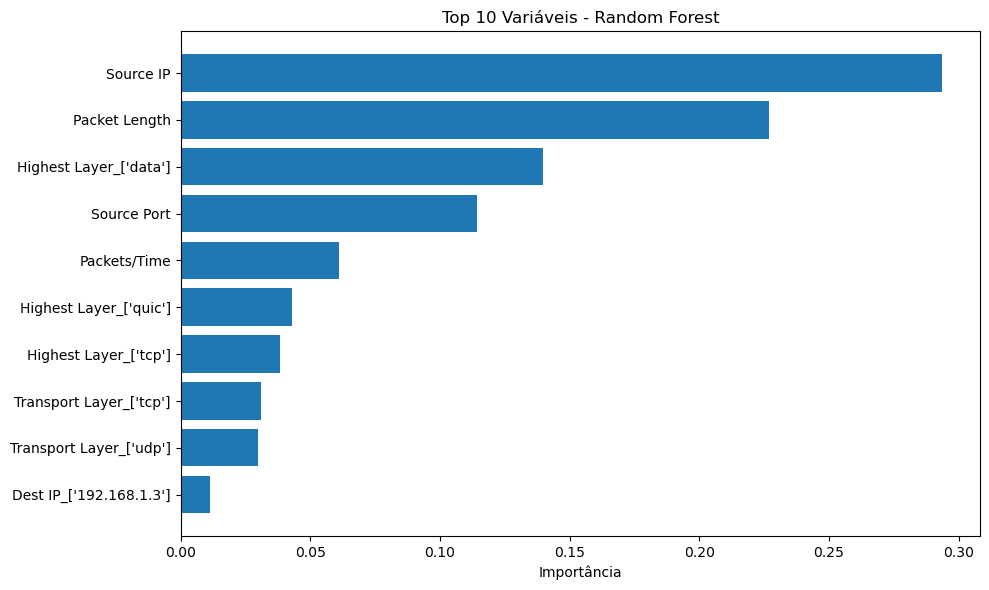

TypeError: read_csv() missing 1 required positional argument: 'filepath_or_buffer'

In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Carregar o dataset
df = pd.read_csv("../datasets/DDoS.csv")

# Visualizar colunas não numéricas
nao_numericas = df.select_dtypes(include=['object']).columns.tolist()
print("Colunas não numéricas:", nao_numericas)

# Remover colunas que não devem ser tratadas como numéricas
colunas_excluir = ['source IP', 'dest IP', 'source port', 'Dest Port']
df = df.drop(columns=colunas_excluir, errors='ignore')

# Transformar colunas de texto em lowercase e split se for o caso
for col in nao_numericas:
    if col in df.columns:
        df[col] = df[col].astype(str).str.lower().str.split().astype(str)

# Codificar variáveis categóricas
df = pd.get_dummies(df)

# Separar atributos e rótulo
X = df.drop(columns=['target'], errors='ignore')  # 'target' deve ser o nome da variável alvo
y = df['target']

# Normalização
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Separação treino/teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Treinar Random Forest
modelo_rf = RandomForestClassifier(n_estimators=100, random_state=42)
modelo_rf.fit(X_train, y_train)

# Importância das variáveis
importancias = modelo_rf.feature_importances_
nomes_variaveis = df.drop(columns=['target'], errors='ignore').columns

# Organizar em DataFrame
df_importancia = pd.DataFrame({'Variável': nomes_variaveis, 'Importância': importancias})
df_importancia = df_importancia.sort_values(by='Importância', ascending=False)

# Exibir principais variáveis
print(df_importancia.head(10))

# Plot opcional
plt.figure(figsize=(10, 6))
plt.barh(df_importancia['Variável'][:10], df_importancia['Importância'][:10])
plt.xlabel("Importância")
plt.title("Top 10 Variáveis - Random Forest")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# 1 Identificar colunas que não são numericas. Ou numericas que nao se comportam como numeros (Ex. porta, ip)
# ...
# 2 Transformar em dummies df.get_dumies onde df é o dataframe que vc importou
# ...
# 3 Variaveis de texto precisam ser transformadas em um array antes com o array.lower().split()
# PLUS - Se sobrar tempo, tentar aplicar uma LDA no phishing.
# 4 Calcular as importancias da árvore
# Rodar experimentos 10x a 30x
# PLUS 2 - Testar no ambiente controlado KALI LINUX
df_phishing = pd.read_csv()